<a href="https://colab.research.google.com/github/EmodioAI/model-development/blob/main/Audio_GAN_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone working repository

In [ ]:
# !git clone https://github.com/maxxies/wavegan-emotion-audio.git
!git clone https://github.com/maxxies/Audio-Synthesis-CycleGAN.git

fatal: destination path 'Audio-Synthesis-CycleGAN' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('Audio-Synthesis-CycleGAN')

# Installations

In [ ]:
!pip3  install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.0 MB/s eta 0:00:00
  Created wheel for pyworld: filename=pyworld-0.3.3-cp310-cp310-linux_x86_64.whl size=887683 sha256=5db3217252d643d7282218b0cf2090157c17b07719c8801fefc895631a9b1b99
  Stored in directory: /root/.cache/pip/wheels/70/50/a9/36b47c7f055bbee666a2b5718aaf85bce2152ef90f9bd10697
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=2faccbeae1b21cdd9d61bc9bdf4c01e233474074fee9bebfb96bbe94b5aff9bb
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b

# Mount dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Train model

In [ ]:
!python3  train.py

Found 1523 files
0it [00:00, ?it/s]Traceback (most recent call last):
  File "/content/wavegan-emotion-audio/train.py", line 223, in <module>
    wave_gan.train()
  File "/content/wavegan-emotion-audio/train.py", line 145, in train
    disc_cost, disc_wd = self.calculate_discriminator_loss(
  File "/content/wavegan-emotion-audio/train.py", line 49, in calculate_discriminator_loss
    disc_out_gen = self.discriminator(generated)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/wavegan-emotion-audio/models.py", line 363, in forward
    x = conv(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/wavegan-emotion-audio/models.py", line 72, in forward
    x = self.conv1d(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_imp

# Evaluation

In [ ]:
# module imports from repository
import utils
import models
import params
import numpy as np
import pescador
import librosa
import matplotlib.pyplot as plt

In [ ]:
def visualize_audio(audio_tensor, is_monphonic=False):
    # takes a batch ,n channels , window length and plots the spectogram
    audio = audio_tensor.detach().cpu().numpy()
    plt.figure(figsize=(18, 50))
    plt.subplot(10, 2, 1)
    if is_monphonic:
        plt.title("Monophonic %i" % (1))
        librosa.display.waveshow(audio[0], sr=16000)
    else:
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio[0])), ref=np.max)
        librosa.display.specshow(D, y_axis="linear")
        plt.colorbar(format="%+2.0f dB")
        plt.title("Linear-frequency power spectrogram %i" % (i))

    plt.show()

In [ ]:
neutral_data = utils.WavDataLoader('/content/drive/MyDrive/Dataset/Emotional Speech Audio/Audios/neutral')


Found 1303 files


In [ ]:
import torch

# Load the model.
checkpoint = torch.load("/content/drive/MyDrive/Dataset/Emotional Speech Audio/gan_happy_exp1.tar")
model_state_dict = checkpoint['generator']

# Create a new instance of the model.
model = models.WaveGANGenerator(slice_len = 65536 ,model_size=32,use_batch_norm=False,num_channels=1) 

# Load the state_dict into the model.
model.load_state_dict(model_state_dict)

# Set the model to evaluation mode.
model.eval()


WaveGANGenerator(
  (fc1): Linear(in_features=100, out_features=16384, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_list): ModuleList(
    (0): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(1024, 512, kernel_size=(25,), stride=(1,))
      )
    )
    (1): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(512, 256, kernel_size=(25,), stride=(1,))
      )
    )
    (2): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(256, 128, kernel_size=(25,), stride=(1,))
      )
    )
    (3): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(128, 64, kernel_size=(25,), stride=(1,))
      )
    )
    (4): Transpose1dLayer(
   

In [ ]:
# Generate random index
random_index = np.random.randint(0,10)

In [ ]:
# Select an audio based on index
test_audio=next(neutral_data)[random_index]

In [ ]:
test_audio.shape

torch.Size([1, 65536])

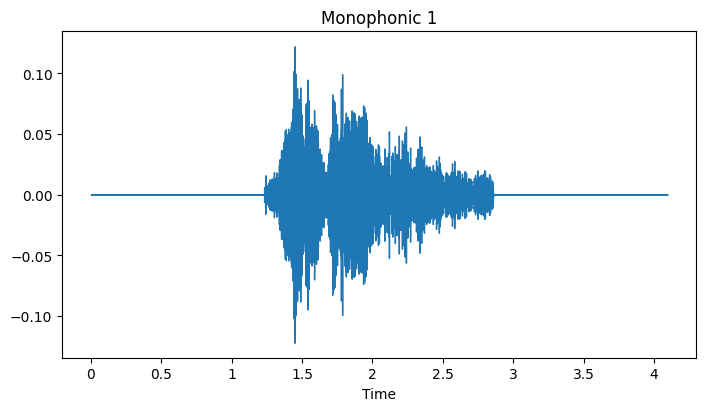

In [ ]:
# plot selected audio
visualize_audio(test_audio, is_monphonic=True)


In [ ]:
device = next(model.parameters()).device
print(device)

cpu


In [ ]:
reshaped_input = test_audio.reshape(100, 16384)
input_tensor = torch.tensor(reshaped_input)

RuntimeError: ignored

In [ ]:
# Make predictions.
with torch.no_grad():
  predictions = model(test_audio.to(device))

# Print the predictions.
print(predictions)

RuntimeError: ignored

# **CycleGAN**

In [ ]:
from params import train_A_dir, train_B_dir
import train

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
data_A_norm,data_B_Norm = train.prepare_data(train_A_dir,train_B_dir)

Preprocessing Data...


World Encode Data:   0% ETA:  --:--:--                                         

Train data A: 1303 loaded
Train data B: 1523 loaded



World Encode Data: 100% Time:  0:28:54                                         
World Encode Data:   2% ETA:   0:28:30                                         

In [ ]:
train.train(data_A_norm,data_A_norm,0)

In [ ]:
from model import CycleGAN

model = CycleGAN(num_features = 24)


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
model.summary()

(<tf.Tensor 'generator_summaries_5/Merge/MergeSummary:0' shape=() dtype=string>,
 <tf.Tensor 'discriminator_summaries_5/Merge/MergeSummary:0' shape=() dtype=string>)